In [1]:
import numpy as np
import torch

In [2]:
# 读取S_1.txt文件
S_1 = np.loadtxt('S_1.txt')

# 转换为488x24的torch tensor
S_1_tensor = torch.tensor(S_1).reshape(488, 24)


In [13]:
torch.norm(S_1_tensor[0] / (4 * 2 ** (0.5)))
torch.norm(S_1_tensor[1] / (4 * 2 ** (0.5)))

tensor(1.0000, dtype=torch.float64)

In [14]:
coor = S_1_tensor / (4 * 2 ** (0.5))

In [17]:
cos_matrix = torch.matmul(coor, coor.T)

In [20]:
cos_matrix = cos_matrix.numpy()

In [21]:
cos_matrix.round(8)

array([[ 1.  , -0.  ,  0.25, ..., -0.25,  0.25,  0.  ],
       [-0.  ,  1.  , -0.  , ...,  0.  ,  0.  ,  0.25],
       [ 0.25, -0.  ,  1.  , ..., -0.25,  0.  ,  0.  ],
       ...,
       [-0.25,  0.  , -0.25, ...,  1.  ,  0.25, -0.  ],
       [ 0.25,  0.  ,  0.  , ...,  0.25,  1.  ,  0.  ],
       [ 0.  ,  0.25,  0.  , ..., -0.  ,  0.  ,  1.  ]])

In [22]:
# 检查对角线元素是否为1
diag_check = np.allclose(np.diag(cos_matrix), 1.0)
print("对角线元素是否都为1:", diag_check)

# 检查所有元素是否属于{0, 1/4, -1/4, -1}
allowed_values = {0, 0.25, -0.25, -1}
cos_matrix = cos_matrix - np.eye(cos_matrix.shape[0])
all_values = set(np.unique(cos_matrix.round(decimals=8)))
print("\n矩阵中的所有不同值:", all_values)
print("是否只包含允许的值:", all_values.issubset(allowed_values))


对角线元素是否都为1: True

矩阵中的所有不同值: {-0.25, -0.0, -1.0, 0.25}
是否只包含允许的值: True


In [23]:
cos_matrix.shape

(488, 488)

In [24]:
coors = coor.numpy()

In [25]:
np.save('488.npy', coors)

In [32]:
degree = np.isclose(cos_matrix, 0.25).sum(axis=1)


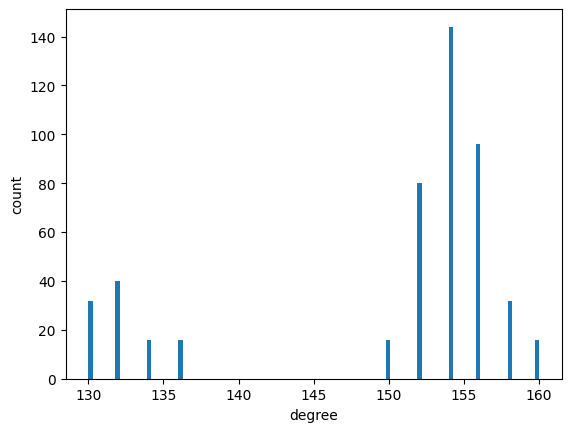

In [35]:
import matplotlib.pyplot as plt
plt.hist(degree, bins=100)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()


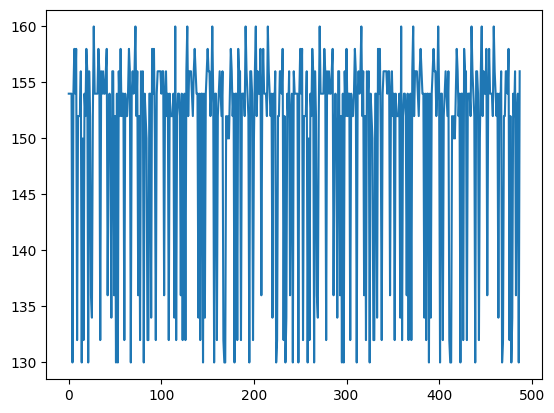

In [34]:
plt.plot(degree)